399 223 RGB JPEG <class 'PIL.JpegImagePlugin.JpegImageFile'>
[110, 72, 51, 110, 72, 53, 107, 68, 51, 105, 65, 53, 108, 68, 58, 111, 71, 63, 107, 67, 59, 103, 60, 53, 103, 59, 50, 108, 61, 51, 109, 61, 51, 107, 57, 48, 108, 55, 47, 110, 55, 50, 111, 53, 51, 107, 49, 47, 87, 50, 42, 100, 63, 57, 82, 42, 42, 95, 54, 58, 93, 54, 55, 58, 21, 13, 113, 75, 56, 219, 174, 141, 235, 176, 134, 255, 185, 138, 255, 173, 126, 245, 153, 114, 210, 127, 97, 163, 97, 75, 122, 74, 60, 85, 48, 39, 85, 41, 42, 91, 45, 45, 99, 54, 51, 107, 59, 55, 112, 61, 57, 115, 62, 56, 117, 62, 55, 118, 64, 54, 117, 60, 49, 120, 63, 52, 120, 63, 52, 114, 60, 48, 114, 60, 50, 116, 64, 53, 117, 64, 56, 114, 61, 53, 119, 67, 56, 120, 66, 56, 122, 65, 54, 124, 64, 53, 125, 63, 50, 124, 62, 49, 122, 62, 51, 120, 61, 53, 110, 55, 48, 126, 73, 65, 121, 69, 58, 120, 67, 51, 122, 64, 44, 116, 55, 27, 146, 80, 48, 195, 127, 92, 230, 154, 96, 228, 149, 93, 229, 149, 96, 233, 153, 104, 226, 144, 97, 205, 122, 80, 187, 103, 66, 180,

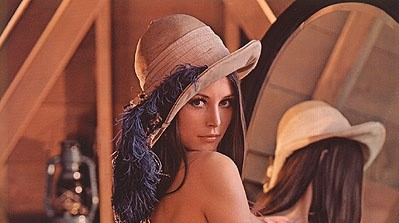

In [10]:
from PIL import Image as i
from IPython.display import Image as id

im = i.open('lady.jpg','r')

print(im.width, im.height, im.mode, im.format, type(im))

pix_val = list(im.getdata())                             #create a list
pix_val_flat = [x for sets in pix_val for x in sets]     #get the values of pixels
print(pix_val_flat)
id(filename='lady.jpg')                                  #print the image


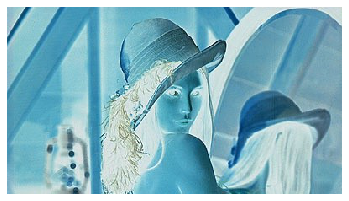

In [11]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt
pic = imageio.imread('lady.jpg')

negative = 255 - pic # neg = (L-1) - img

plt.figure(figsize = (6,6))
plt.imshow(negative);
plt.axis('off');

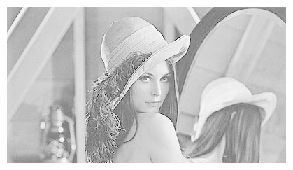

In [12]:
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(pic)

'''
log transform
-> s = c*log(1+r)

So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)

'''

max_ = np.max(gray)

'''
#Objective: Perform Log Transformation    
#Input: Original Image
#Output: Resultant Image
'''

def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)

plt.figure(figsize = (5,5))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off');

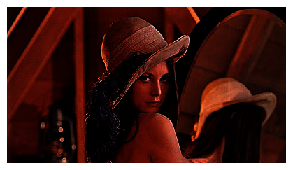

In [13]:
gamma = 0.3 # Gamma < 1 ~ Dark  ;  Gamma > 1 ~ Bright

gamma_correction = ((pic/255) ** (1/gamma)) 
plt.figure(figsize = (5,5))
plt.imshow(gamma_correction)
plt.axis('off');